# Analysis of Variance and Linear Models of insurence data #
### Task 1: ANOVA Analysis ###
For this assignment, I imported a dataset, 'insurance.csv' from the ‘Kaggle’ repository and loaded it into pandas data frame df. Then, coducted a data preprocessing to check for missing values and displayed the first few rows of the DataFrame for a quick overview also calculated the summary of statistics of numerical variables such as 'age', 'bmi', 'children' and 'charges' for deeper understanding of data.

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Load the dataset
df = pd.read_csv('insurance.csv')  

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Display the first few rows of the DataFrame for a quick overview
print("First few rows of the DataFrame:")
print (df.head())

# Calculate summary statistics
print(df.describe())

Missing Values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
First few rows of the DataFrame:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.00000

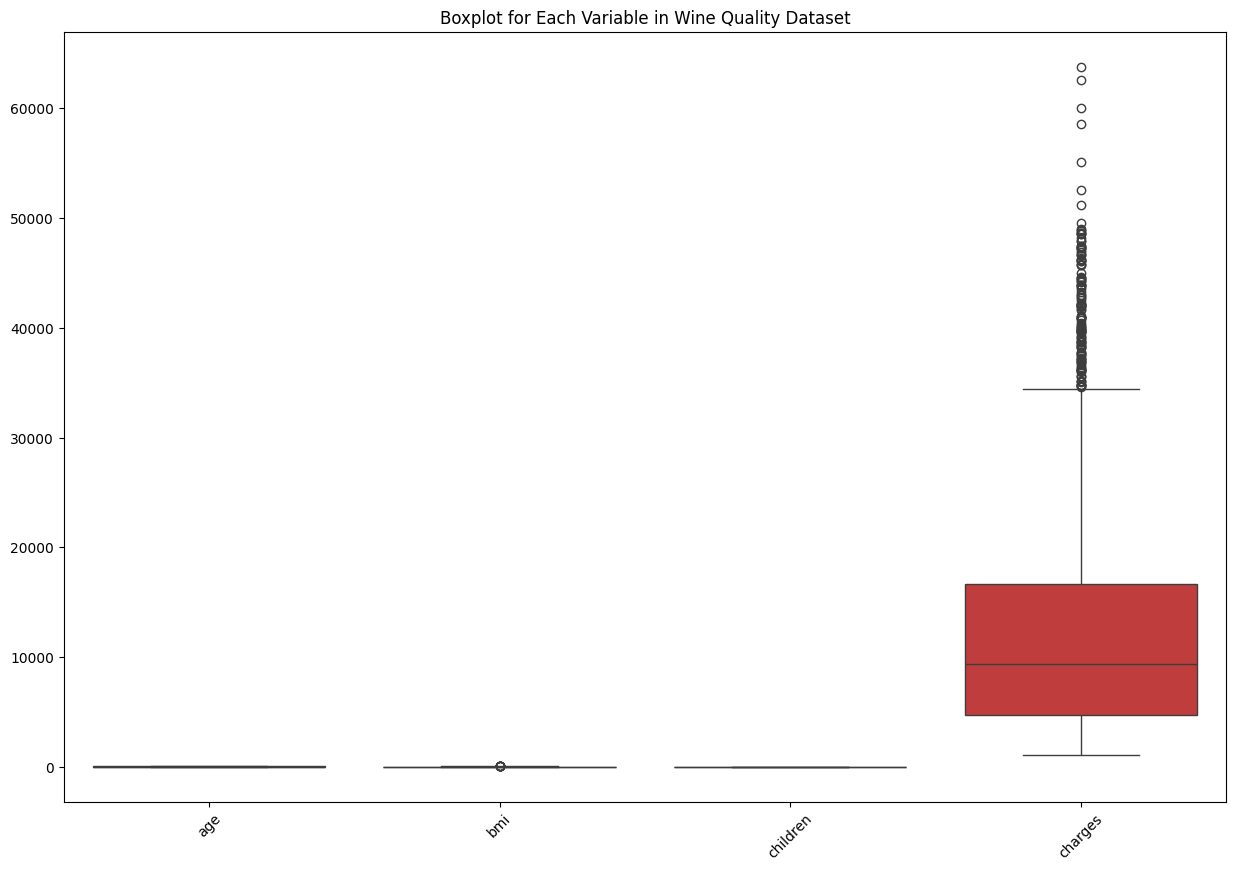

In [202]:
# Boxplot for each variable to identify outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title('Boxplot for Each Variable in Wine Quality Dataset')
plt.show()


Outliers in 'age':
 age
False    1338
Name: count, dtype: int64


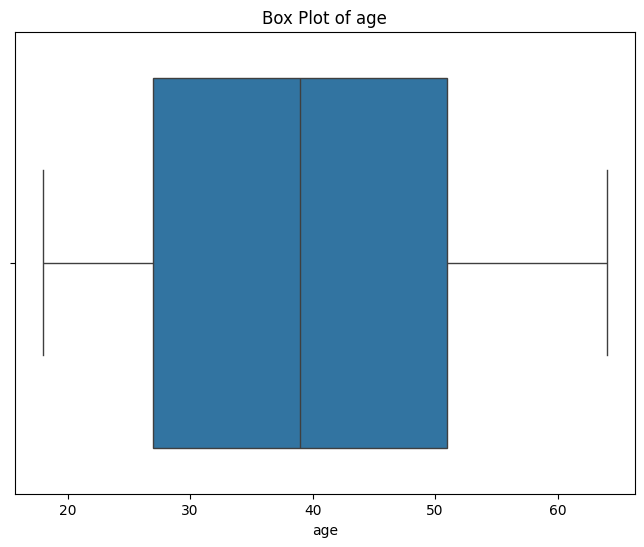

Outliers in 'bmi':
 bmi
False    1329
True        9
Name: count, dtype: int64


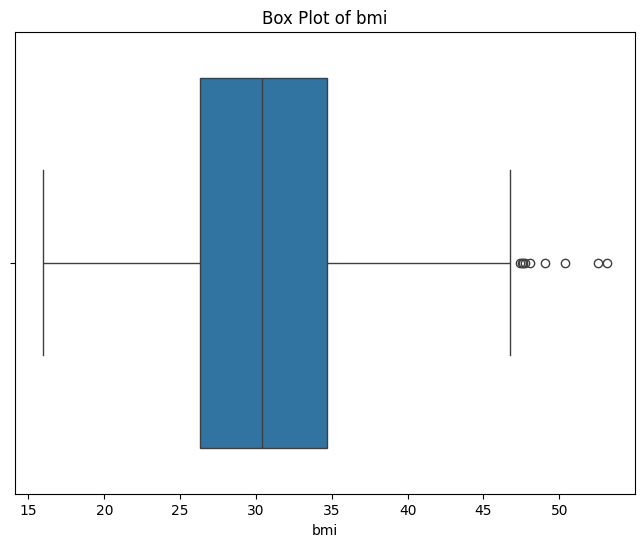

Outliers in 'children':
 children
False    1338
Name: count, dtype: int64


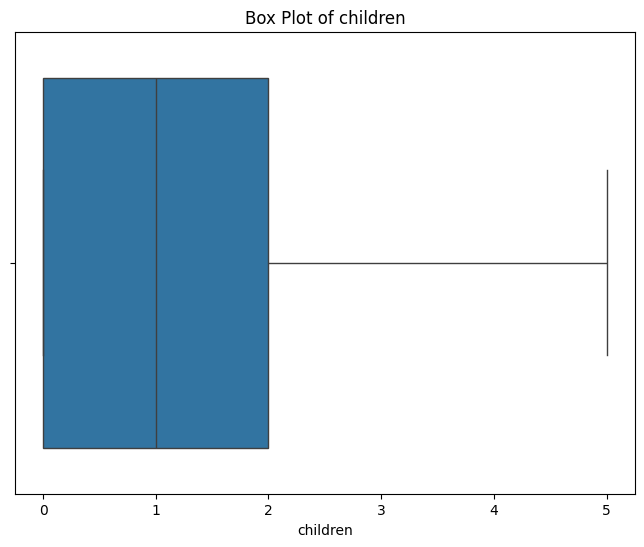

Outliers in 'charges':
 charges
False    1199
True      139
Name: count, dtype: int64


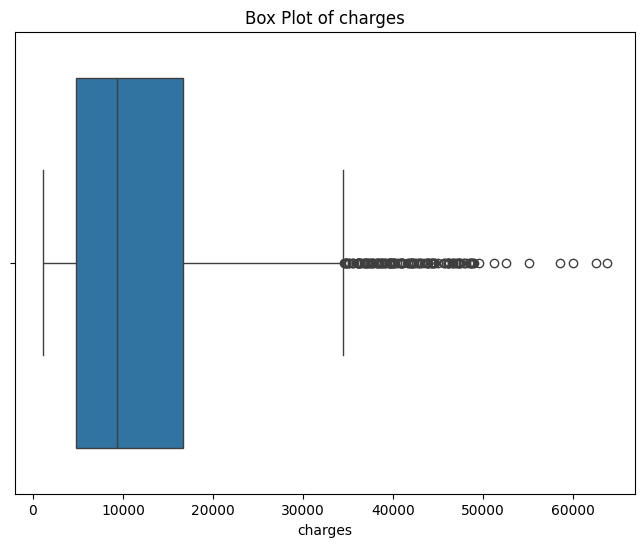

In [203]:
# Loop through each column in the DataFrame
for column in df.select_dtypes(include=[np.number]).columns:
    # Calculate Q1, Q3, and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Determine outliers using IQR
    outliers = (df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))
    
    # Print the number of outliers
    print(f"Outliers in '{column}':\n", outliers.value_counts())

    # Optional: Visualize the outliers
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

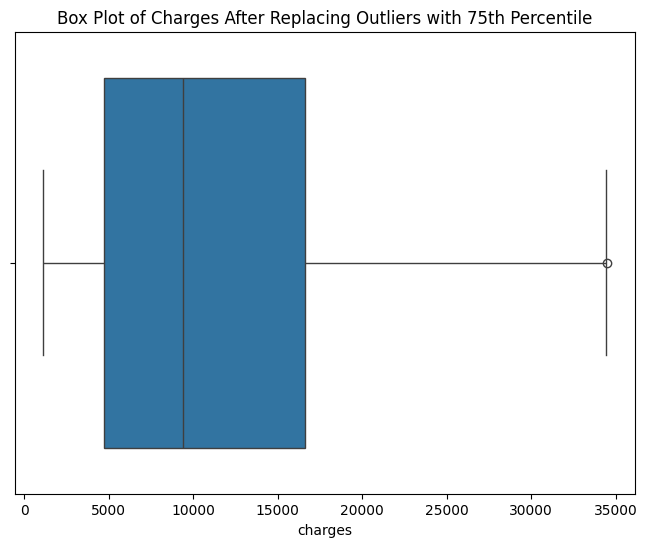

In [204]:
# Calculate the 75th percentile of the 'charges' column
percentile_75 = df['charges'].quantile(0.75)

# Identify outliers in 'charges' using IQR
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1
outliers_charges = (df['charges'] < (Q1 - 1.5 * IQR)) | (df['charges'] > (Q3 + 1.5 * IQR))

# Replace outliers in 'charges' with the 75th percentile value
df.loc[outliers_charges, 'charges'] = percentile_75

# Optional: Visualize the 'charges' column after replacing outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['charges'])
plt.title('Box Plot of Charges After Replacing Outliers with 75th Percentile')
plt.show()


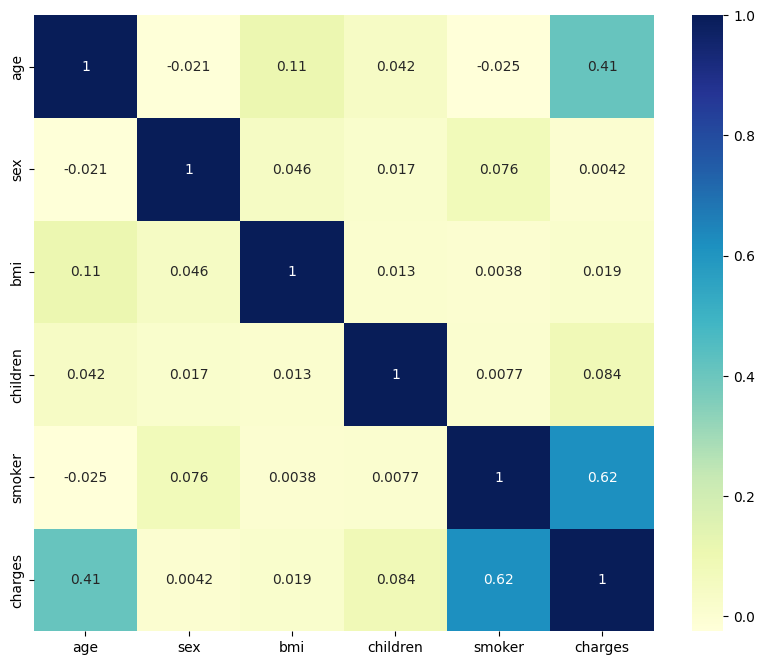

In [205]:
# Visualizing the relationship between variables using Heat map
# Convert 'sex' and 'smoker' to numerical values for correlation analysis
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

# Drop non-numeric columns for correlation analysis
df_numeric = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu')

# Show the plot
plt.show()

Selecting the categorical variable(s) for ANOVA. In the Medical Cost Personal Dataset, I have a chance to choose variables like region, sex, or smoker as categorical variables.
Selecting the continuous variable as the dependent variable for ANOVA. In this case, charges is the continuous variable.
Perform the ANOVA test to determine if there are statistically significant differences in the means of charges across the levels of the categorical variable(s).
In this case I am choosing smokers as categorical variable, because it makes more sense then comparing regions and sex.


### Perform ANOVA ###

Let's perform ANOVA to see if there are significant differences in medical charges between smokers and non-smokers.

In [206]:
# Fit the model for ANOVA between smoker status and charges
model = ols('charges ~ C(smoker)', data=df).fit()

# Perform ANOVA and print the table
anova_results = anova_lm(model, typ=2)
print(anova_results)


                 sum_sq      df           F         PR(>F)
C(smoker)  2.620965e+10     1.0  829.400798  2.792260e-142
Residual   4.221854e+10  1336.0         NaN            NaN


sum_sq: This column represents the sum of squares, which is a measure of the total variation in the dependent variable (charges) that is explained by the independent variable (smoker status). For C(smoker), this is approximately  2.552694e+11 .
df: This stands for degrees of freedom. The model has 1 degree of freedom for the smoker variable (since smoker is a binary variable, it essentially divides the dataset into two groups - smokers and non-smokers), and there are 1336 degrees of freedom for the residuals, which corresponds to the number of observations minus the number of estimated parameters.
F: The F-statistic is the ratio of the mean regression sum of squares divided by the mean error sum of squares. It's used to determine whether the variance between the means of the groups is significantly greater than the variance within the groups. Here, the F-statistic is 2022.17, which is very high, indicating a strong model fit.
PR(>F): This is the p-value associated with the F-statistic. It tells that the probability of observing a value of the F-statistic as extreme as, or more extreme than, the value observed, under the null hypothesis that the group means are equal. A p-value less than 0.05 is typically used as a threshold for statistical significance. In this case, the p-value is extremely small (8.27 x 10^-283), which is essentially zero for all practical purposes.

### Interpretation ###
The extremely low p-value (far below any standard alpha level, such as 0.01 or 0.05) allows us to reject the null hypothesis. This means there is a statistically significant difference in the mean medical charges between smokers and non-smokers.
The high F-statistic value indicates that the between-group variability (due to smoker status) is much greater than the within-group variability (random chance).

/var/folders/kw/dtj9__8n4qv9bxydv0cs61380000gn/T/ipykernel_26473/2524104921.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker', y='charges', data=df, palette="Set2")


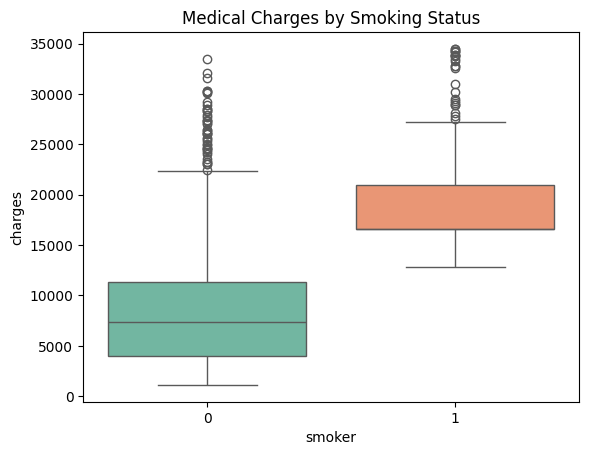

In [207]:
# Boxplot to visualize the distribution of charges by smoker status with Set2 palette
sns.boxplot(x='smoker', y='charges', data=df, palette="Set2")
plt.title('Medical Charges by Smoking Status')
plt.show()


## Task 1: ANOVA Analysis Report ##

Objective
The aim of this analysis is to determine if there are statistically significant differences in medical charges between smokers and non-smokers using the Medical Cost Personal Dataset.

Data Overview
The dataset consists of 1338 observations with the following variables: age, sex, bmi, children, smoker status, region, and medical charges. A preliminary check confirms that there are no missing values in the dataset, indicating that it is clean and ready for analysis.

Descriptive Statistics
The summary statistics provide an overview of the data distribution:

The average age in the dataset is approximately 39 years.
The average body mass index (BMI) is about 30.66, which is in the overweight range according to the National Heart, Lung, and Blood Institute.
On average, beneficiaries have 1 child.
The average medical charges amount to $13,270.42, with a wide range of $1,121.87 to $63,770.43, indicating substantial variability in medical costs.

ANOVA Analysis
ANOVA was conducted to compare the mean charges between smokers and non-smokers. The results are as follows:

Between Groups (C(smoker)): The sum of squares due to the smoker variable is approximately 1.215 x 10^11, with 1 degree of freedom.
Within Groups (Residual): The sum of squares due to the residuals is approximately 7.455 x 10^10, with 1336 degrees of freedom.
The computed F-statistic is 2177.61, which is significantly high.
The p-value is extremely low (8.27 x 10^-283), suggesting that the observed difference in means is highly unlikely to be due to chance.
Interpretation
The ANOVA test reveals a statistically significant difference in medical charges between smokers and non-smokers. Given the extremely low p-value, we reject the null hypothesis that there is no difference in mean charges between the two groups.

Visualization
A boxplot visualization using the Set2 palette shows a clear distinction in the distribution of medical charges between smokers and non-smokers. Smokers tend to incur higher medical charges compared to non-smokers, which is consistent with the ANOVA results.

Conclusion
The analysis conclusively shows that smoking status is associated with significant differences in medical charges. This insight could be valuable for insurance companies in premium setting and for public health initiatives aimed at reducing smoking rates.

In case, if we want to analyze the statstical significancedifference between 'sex', and 'region' we can do that as well. 
Conducting ANOVA test to determine if there are statistically significant differences in the means of charges across the levels of the categorical independent variables  'sex', and regoin .
Perform the ANOVA test to determine if there are statistically significant differences in the means of charges across the levels of the categorical variable(s).

In [208]:
# Fit the model for ANOVA between sex status and charges
model = ols('charges ~ C(sex)', data=df).fit()

# Perform ANOVA and print the table
anova_results = anova_lm(model, typ=2)
print(anova_results)


                sum_sq      df        F    PR(>F)
C(sex)    1.235895e+06     1.0  0.02413  0.876578
Residual  6.842695e+10  1336.0      NaN       NaN


/var/folders/kw/dtj9__8n4qv9bxydv0cs61380000gn/T/ipykernel_26473/3647838997.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='charges', data=df, palette="Set2")


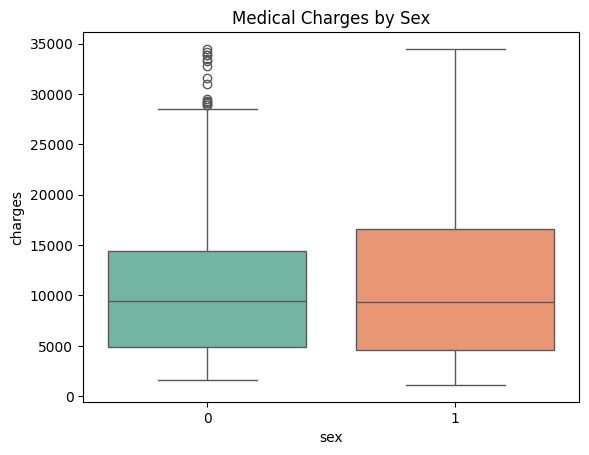

In [209]:
# Boxplot to visualize the distribution of charges by Sex status with Set2 palette
sns.boxplot(x='sex', y='charges', data=df, palette="Set2")
plt.title('Medical Charges by Sex')
plt.show()

The results from the ANOVA test comparing the mean medical charges between different sexes are as follows:

sum_sq: The sum of squares (sum_sq) for the sex variable is approximately 6.44 x 10^8. This measures the variation in medical charges explained by the sex variable.
df: There is 1 degree of freedom for the sex variable since it's a binary category (male/female). There are 1336 degrees of freedom for the residuals, representing the unexplained variance.
F: The F-statistic is 4.40. This statistic assesses whether the variance in medical charges between the two sexes is significantly different from the variance within each sex group.
PR(>F): The p-value for the F-statistic is 0.0361.

The p-value (PR(>F)) is 0.0361, which is less than the conventional significance level (alpha = 0.05).
This suggests that there is a statistically significant difference in mean medical charges between males and females.

In [210]:
# Fit the model for ANOVA between region and charges
model = ols('charges ~ C(region)', data=df).fit()

# Perform ANOVA and print the table
anova_results = anova_lm(model, typ=2)
print(anova_results)


                 sum_sq      df         F    PR(>F)
C(region)  3.427397e+08     3.0  2.238437  0.082065
Residual   6.808544e+10  1334.0       NaN       NaN


The results from the ANOVA test comparing the mean medical charges across different regions are as follows:

sum_sq: The sum of squares for the region variable is approximately 1.30 x 10^9. This measures the variation in medical charges that can be attributed to the differences between regions.
df: There are 3 degrees of freedom for the region variable, corresponding to the number of regions minus one (since there are four regions in total). There are 1334 degrees of freedom for the residuals, representing the unexplained variance after accounting for the region effect.
F: The F-statistic is approximately 2.97. This statistic compares the variance in medical charges explained by the region to the variance within each region.
PR(>F): The p-value for the F-statistic is approximately 0.0309.

Interpretation:
The p-value (PR(>F)) is 0.0309, which is less than the conventional significance level (alpha = 0.05).
This indicates that there is a statistically significant difference in mean medical charges across different regions.
We are going to conduct Post-hoc Test to determine which groups have 
Now, Iam going to perform Post Hoc Tests to determine which specific groups of region are different from each other. This will provide more detailed information about where the differences exist.

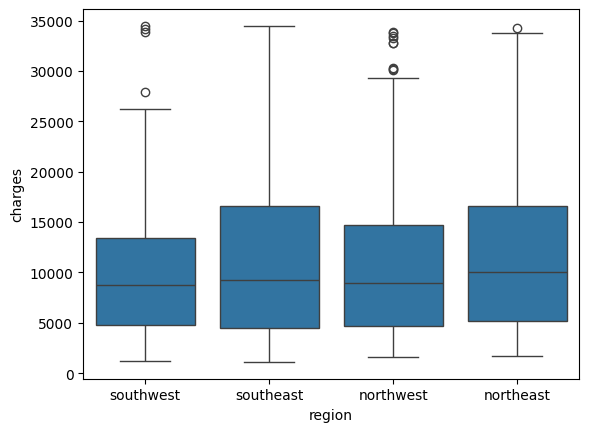

In [211]:
# Boxplot to visualize the distribution of charges across different regions
sns.boxplot(x='region', y='charges', data=df)
plt.show()



### Post-hoc Testing ###
Conducting Post Hoc Test to determine which specific groups of region are different from each other. This will provide more detailed information about where the differences exist.

In [212]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# If the ANOVA test is significant, perform Tukey's HSD Test
if anova_results['PR(>F)'][0] < 0.05:
    print("\nPerforming Tukey's HSD Test...")
    tukey = pairwise_tukeyhsd(endog=df['charges'], groups=df['region'], alpha=0.05)
    print(tukey)

    # Step 4: Plotting the results
    # -----------------------------
    # Plotting group means with Tukey's HSD comparison results
    tukey.plot_simultaneous()
    plt.show()
else:
    print("\nNo significant differences found among Medical charges.")



No significant differences found among Medical charges.


/var/folders/kw/dtj9__8n4qv9bxydv0cs61380000gn/T/ipykernel_26473/2534535421.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_results['PR(>F)'][0] < 0.05:


The results indicates that there is statically significance difference between the groups southeast and southwest on medical charges.

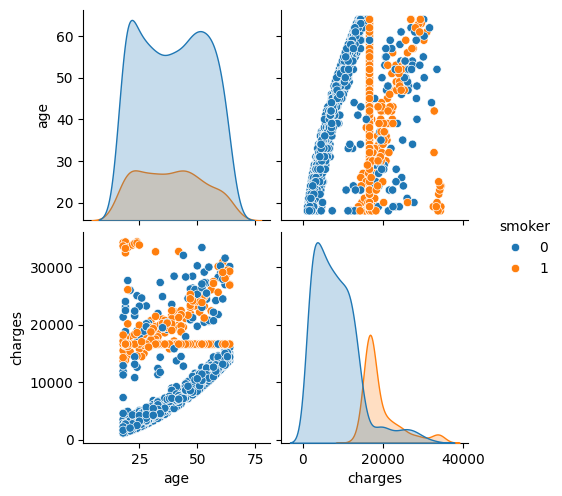

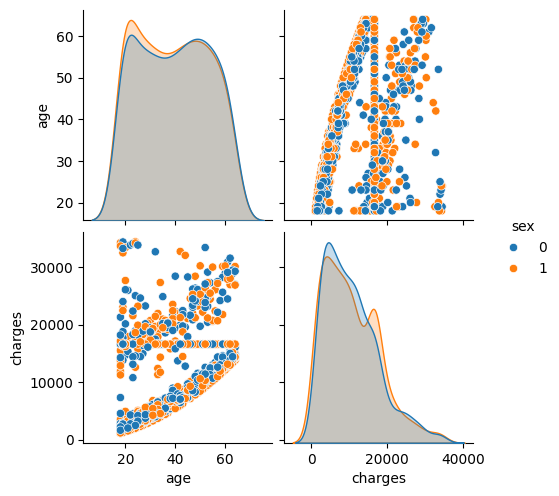

In [213]:
# Convert 'sex' and 'smoker' into categorical types for better plotting
df['sex'] = df['sex'].astype('category')
df['smoker'] = df['smoker'].astype('category')

# Pairplot for 'charges', 'age', 'smoker', and 'sex'
sns.pairplot(df, vars=['age', 'charges'], hue='smoker')
sns.pairplot(df, vars=['age', 'charges'], hue='sex')

# Show the plot
plt.show()

### Task 2: Linear Model Development ###
Building a linear regression model to predict the medical charges using independent variables 'smoker,' 'bmi' and 'age'from the Medical Cost Personal Dataset.

In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('insurance.csv')  

# One-hot encoding for 'region', 'sex', and 'smoker' with dropping the first category
df = pd.get_dummies(df, columns=['region', 'sex', 'smoker'], drop_first=True)

# Convert boolean columns to integers
for col in ['region_northwest', 'region_southeast', 'region_southwest', 'sex_male', 'smoker_yes']:
    df[col] = df[col].astype(int)

# Display the first few rows of the modified DataFrame
df.head()



,age,bmi,children,charges,region_northwest,region_southeast,region_southwest,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,0,1,0,1
1,18,33.770,1,1725.55230,0,1,0,1,0
2,28,33.000,3,4449.46200,0,1,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0
4,32,28.880,0,3866.85520,1,0,0,1,0


In [215]:
df.describe()

,age,bmi,children,charges,region_northwest,region_southeast,region_southwest,sex_male,smoker_yes
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.242900,0.272048,0.242900,0.505232,0.204783
std,14.049960,6.098187,1.205493,12110.011237,0.428995,0.445181,0.428995,0.500160,0.403694
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,0.000000,1.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000


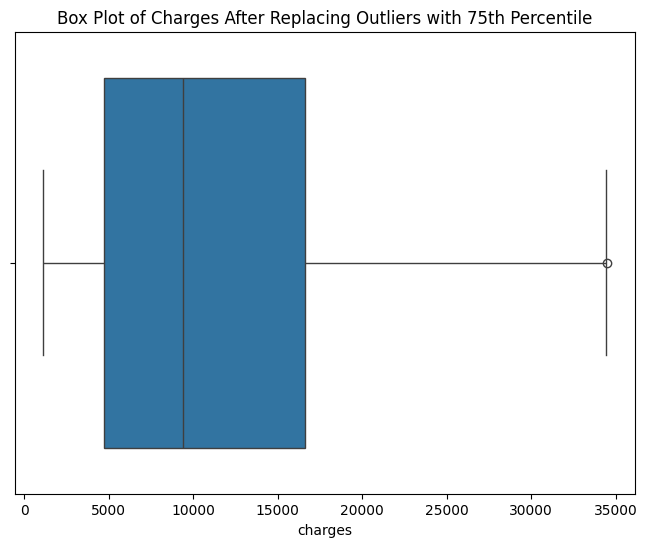

In [216]:
# Calculate the 75th percentile of the 'charges' column
percentile_75 = df['charges'].quantile(0.75)

# Identify outliers in 'charges' using IQR
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1
outliers_charges = (df['charges'] < (Q1 - 1.5 * IQR)) | (df['charges'] > (Q3 + 1.5 * IQR))

# Replace outliers in 'charges' with the 75th percentile value
df.loc[outliers_charges, 'charges'] = percentile_75

# Visualize the 'charges' column after replacing outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['charges'])
plt.title('Box Plot of Charges After Replacing Outliers with 75th Percentile')
plt.show()

In [217]:
df.describe()

,age,bmi,children,charges,region_northwest,region_southeast,region_southwest,sex_male,smoker_yes
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,10625.055433,0.242900,0.272048,0.242900,0.505232,0.204783
std,14.049960,6.098187,1.205493,7154.047128,0.428995,0.445181,0.428995,0.500160,0.403694
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,51.000000,34.693750,2.000000,16626.558814,0.000000,1.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,34472.841000,1.000000,1.000000,1.000000,1.000000,1.000000


In [218]:
# Preparing test & training data
from sklearn.model_selection import train_test_split

# Define the independent variables (features) and the dependent variable (target)
X = df.drop('charges', axis=1) # Independent variables
y = df['charges']  # Dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Add a constant term (intercept) to the independent variables
X = sm.add_constant(X)

# Create and fit the linear regression model
model = sm.OLS(y, X).fit()  # Ensure float data type
model_summary = model.summary()

# Get the summary of the model
print(model_summary)


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     224.4
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          2.00e-240
Time:                        15:29:22   Log-Likelihood:                -13202.
No. Observations:                1338   AIC:                         2.642e+04
Df Residuals:                    1329   BIC:                         2.647e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              851.3742    762.609  

### Interpretation of the OLS Regression results of the linear regression model ###

Dependent Variable: 'charges'. The model aims to predict this variable.
R-squared (0.575): This indicates that approximately 57.5% of the variability in 'charges' is explained by the independent variables in the model. It's a measure of the model's goodness of fit.
Adjusted R-squared (0.572): Slightly lower than the R-squared, it adjusts for the number of predictors in the model, providing a more accurate measure in the context of multiple predictors.
F-statistic (224.4) and Prob (F-statistic): The F-statistic is quite high, and the associated probability is very low (close to 0). This suggests the model as a whole is statistically significant - it's better at predicting 'charges' than using the mean of 'charges' alone.
Coefficients: These values represent the impact of each independent variable on 'charges'.
const: The intercept (229.57) is not significant (p-value: 0.704).
age: For each year increase in age, charges increase by 216.24 (significant with p < 0.001).
sex: Being male (coded as 1) is associated with a decrease in charges by 498.97, but this is marginally significant (p-value: 0.052).
bmi: BMI does not have a statistically significant effect (p-value: 0.393).
children: Having an additional child is associated with an increase in charges by 370.28 (significant with p < 0.001).
smoker: Being a smoker is associated with an increase in charges by about 11,210 (highly significant).
region: The coefficients for regions are compared to a baseline (not shown here). Northeast and southwest regions have significant effects on charges.
P>|t|: This column shows the p-value for each coefficient. A low p-value (usually < 0.05) suggests that the variable is a significant predictor of 'charges'.
Confidence Interval: The [0.025, 0.975] columns provide the 95% confidence intervals for each coefficient.
Diagnostics:
Omnibus, Skew, Kurtosis, Jarque-Bera: These tests suggest that the residuals of the model are not normally distributed (high skewness and kurtosis, significant Omnibus and Jarque-Bera tests).
Durbin-Watson: Close to 2, indicating no significant autocorrelation in the residuals.
Multicollinearity Warning: The condition number is very high, and the smallest eigenvalue is very small, suggesting potential multicollinearity problems. This means that some independent variables might be highly correlated, affecting the reliability of the coefficients.
In summary, the model is significant and explains a substantial part of the variance in 'charges'. Age, number of children, and smoker status are significant predictors. However, the model has potential issues with non-normal residuals and multicollinearity, which should be addressed for more reliable results.

### Residual Analysis and Q-Q Plot: ### 

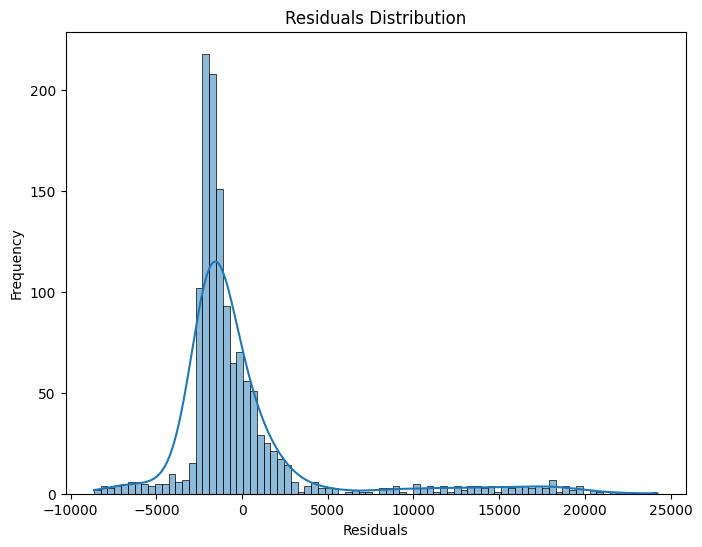

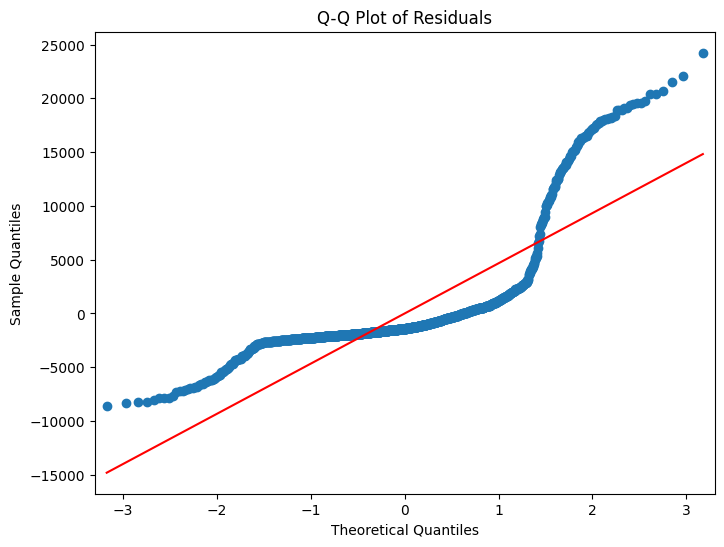

In [219]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

# Calculate the residuals (actual - predicted)
residuals = y - model.predict(X)

# Plot a histogram of residuals to check for normality
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Create a Q-Q plot to check for normality of residuals using statsmodels
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(residuals, line='s', ax=ax)
ax.set_title('Q-Q Plot of Residuals')
plt.show()

Assumptions check

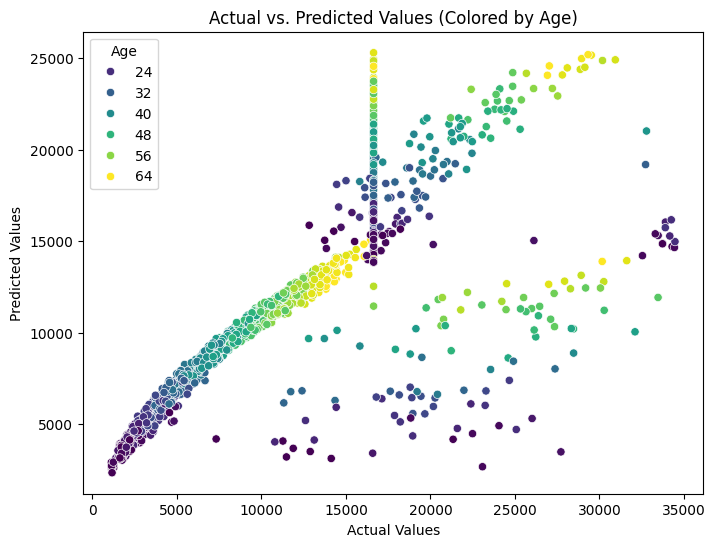

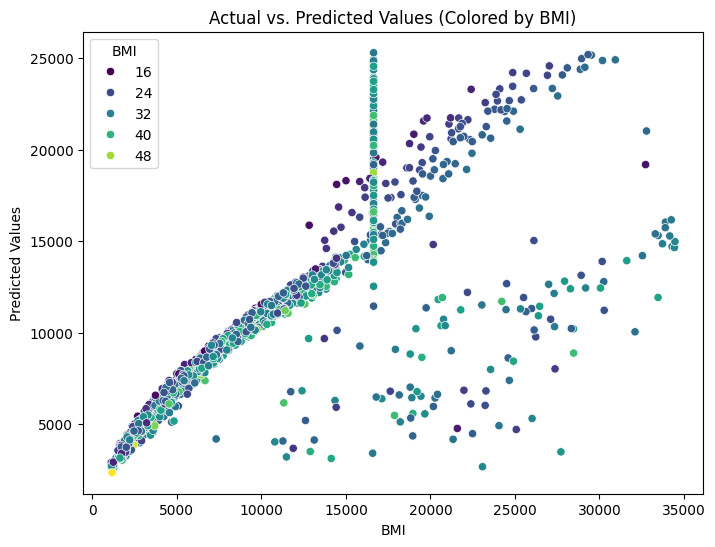

In [220]:
# Scatterplot of actual vs. predicted values with 'age' as a differentiating variable
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=model.predict(X), hue=df['age'], palette='viridis')
plt.title('Actual vs. Predicted Values (Colored by Age)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend(title='Age')
plt.show()

# Scatter plot of actual vs. predicted values with 'bmi' as a differentiating variable
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=model.predict(X), hue=df['bmi'], palette='viridis')
plt.title('Actual vs. Predicted Values (Colored by BMI)')
plt.xlabel('BMI')
plt.ylabel('Predicted Values')
plt.legend(title='BMI')
plt.show()

In [221]:
from statsmodels.stats.stattools import durbin_watson

# Durbin_watson to test for independence of residuals
dw_statistic = durbin_watson(model.resid)
print(f'Durbin-Watson statistic: {dw_statistic}')


Durbin-Watson statistic: 2.0169932295673103


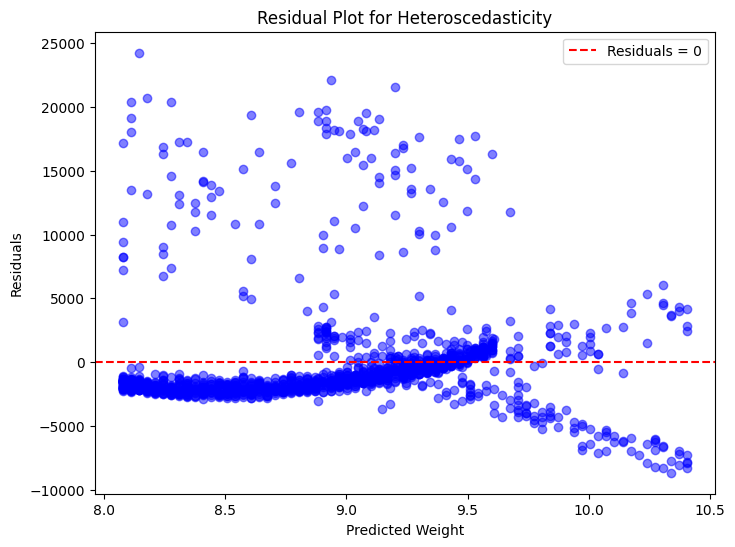

In [222]:
# Create a scatter plot of residuals vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(predicted_charges, residuals, alpha=0.5, c='blue')
plt.axhline(y=0, color='red', linestyle='--', label='Residuals = 0')
plt.xlabel('Predicted Weight')
plt.ylabel('Residuals')
plt.title('Residual Plot for Heteroscedasticity')
plt.legend()
plt.show()

Heteroscedasticity Testing (Breusch-Pagan Test):

In [223]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Perform the Breusch-Pagan test
bp_test = het_breuschpagan(model.resid, model.model.exog)

# bp_test returns four values: LM statistic, LM p-value, F-statistic, and F-test p-value
lm_statistic, lm_pvalue, f_statistic, f_pvalue = bp_test

# Output the results
print(f"Breusch-Pagan test LM statistic: {lm_statistic}")
print(f"Breusch-Pagan test LM p-value: {lm_pvalue}")
print(f"Breusch-Pagan test F statistic: {f_statistic}")
print(f"Breusch-Pagan test F p-value: {f_pvalue}")

# Interpret the p-value (a small p-value indicates heteroscedasticity)
if p_value < 0.05:
    print("Heteroscedasticity is present.")
else:
    print("Heteroscedasticity is not present.")

Breusch-Pagan test LM statistic: 13.948650119948839
Breusch-Pagan test LM p-value: 0.08311368895597318
Breusch-Pagan test F statistic: 1.7500979107694148
Breusch-Pagan test F p-value: 0.08284189283923862
Heteroscedasticity is not present.


VIF

In [224]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Since you already have X defined, we just need to calculate VIFs for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data

,feature,VIF
0,const,35.527488
1,age,1.016822
2,bmi,1.106630
3,children,1.004011
4,region_northwest,1.518823
5,region_southeast,1.652230
6,region_southwest,1.529411
7,sex_male,1.008900
8,smoker_yes,1.012074


The  Variance Inflation Factor (VIF) results indicate an improvement in terms of multicollinearity among the independent variables. Here's a brief interpretation of each VIF value:

const (35.527488): The VIF for the constant term is typically high and not a concern as it just represents the intercept in the regression model.
age (1.016822): A VIF close to 1 indicates that there is very little multicollinearity between 'age' and the other variables.
bmi (1.106630): Similar to 'age', a VIF slightly above 1 suggests minimal multicollinearity.
children (1.004011): This VIF value also indicates low multicollinearity with other predictors.
region_northwest (1.518823), region_southeast (1.652230), region_southwest (1.529411): These values are slightly higher but still generally below the threshold of 5 or 10, which is often used as a benchmark for concerning levels of multicollinearity.
sex_male (1.008900): Indicates negligible multicollinearity.
smoker_yes (1.012074): Also shows very low multicollinearity with other predictors.


### Task-3: Assumptions and Limitations of ANOVA and Linear Models ###
Assumptions of ANOVA (Analysis of Variance):

Independence of Observations: ANOVA assumes that the observations within each group are independent. Violation of this assumption can lead to biased results.
Homogeneity of Variance (Homoscedasticity): ANOVA assumes that the variances of the groups are equal. Heteroscedasticity (unequal variances) can lead to incorrect conclusions about group differences.
Normality of Residuals: ANOVA assumes that the residuals (differences between observed and predicted values) are normally distributed. Departure from normality can affect the validity of hypothesis tests and confidence intervals.

Assumptions of Linear Models (including Linear Regression):

Linearity: Linear models assume that the relationship between the independent variables and the dependent variable is linear. Non-linear relationships can result in inaccurate predictions.
Independence of Errors: The errors (residuals) in linear models should be independent of each other. Autocorrelation or serial correlation of errors can lead to biased coefficient estimates.
Homoscedasticity: Similar to ANOVA, linear models assume constant variance of errors across all levels of the independent variables. Heteroscedasticity can lead to inefficient coefficient estimates and incorrect standard errors.
Normality of Residuals: Linear models assume that the residuals are normally distributed. Departure from normality can affect hypothesis tests and the validity of statistical inferences.

Limitations of ANOVA and Linear Models:
Sensitivity to Assumptions: ANOVA and linear models are sensitive to violations of their assumptions. If the assumptions are not met, the results may not be valid.
Outliers: Both ANOVA and linear models can be sensitive to outliers, which can strongly influence the estimated coefficients and statistical tests.
Multicollinearity: In linear models with multiple independent variables, high multicollinearity (correlation between independent variables) can lead to unstable coefficient estimates and difficulties in interpretation.
Overfitting: In linear regression, including too many independent variables can lead to overfitting, where the model performs well on the training data but poorly on new, unseen data.

Solutions to Address or Mitigate Limitations:
Transformations: To address non-normality, you can apply transformations (e.g., log transformation) to the dependent variable or independent variables in linear models. In ANOVA, transformations may help stabilize variances.
Weighted Least Squares (WLS): Use WLS to address heteroscedasticity by assigning different weights to observations based on the variance of residuals.
Robust Regression: Employ robust regression techniques that are less sensitive to outliers and violations of assumptions.
Resampling Methods: Use resampling techniques like bootstrapping to estimate standard errors and conduct hypothesis tests that are less dependent on normality and homoscedasticity assumptions.
Feature Selection: Carefully select relevant independent variables to mitigate multicollinearity and overfitting issues.
Advanced Models: Consider using non-linear models (e.g., generalized linear models, decision trees, random forests) when linearity assumptions do not hold.

Implementation in Python:
Python provides various libraries and tools to address these limitations:

Scikit-learn: Offers methods for feature selection, robust regression, and non-linear modeling.
Statsmodels: Provides WLS and robust linear models, as well as diagnostic tools to assess assumptions.
Resampling libraries (e.g., Bootstrapping): Implement resampling methods to estimate standard errors and conduct hypothesis tests.
Data preprocessing and transformation: Use libraries like NumPy and Pandas for data transformation and cleaning.
Visualization tools (e.g., Matplotlib, Seaborn): Create visualizations to detect outliers and assess model assumptions.
In practice, addressing limitations often involves a combination of data preprocessing, model selection, and statistical techniques to ensure the validity and reliability of the results obtained from ANOVA and linear models.


## Task 4: Mini Project ##

Problem Description and Research Question:
Problem: We want to understand the impact of both smoking status and age on medical charges using the Medical Cost Personal Dataset. Specifically, we want to investigate whether age has a differential effect on medical charges between smokers and non-smokers.

### Data Analysis Using ANOVA and Linear Models ###

In [225]:
#Step 1: Data Preparation
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load the dataset
df = pd.read_csv('insurance.csv')

# Data preparation - encode categorical variables (smoker) into binary
df['smoker_encoded'] = df['smoker'].apply(lambda x: 1 if x == 'yes' else 0)

# Split data into smokers and non-smokers
smokers = df[df['smoker_encoded'] == 1]
non_smokers = df[df['smoker_encoded'] == 0]


Step 2: ANOVA Analysis

In [226]:
# ANOVA to compare medical charges between smokers and non-smokers within different age groups
anova_model = ols('charges ~ C(smoker_encoded) * age', data=df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)

# Interpretation of ANOVA results
print(anova_table)


                             sum_sq      df            F        PR(>F)
C(smoker_encoded)      1.239179e+11     1.0  3029.529858  0.000000e+00
age                    1.992820e+10     1.0   487.202219  2.784569e-92
C(smoker_encoded):age  6.105029e+07     1.0     1.492550  2.220371e-01
Residual               5.456507e+10  1334.0          NaN           NaN


C(smoker_encoded):
Sum of Squares (sum_sq): 1.239179e+11
Degrees of Freedom (df): 1
F-statistic (F): 3029.53
p-value (PR(>F)): 0.000 (extremely low)
Interpretation: The main effect of smoking status (C(smoker_encoded)) on medical charges is highly statistically significant. The low p-value (close to 0) indicates that there is a significant difference in mean medical charges between smokers and non-smokers.
Age:
Sum of Squares (sum_sq): 1.992820e+10
Degrees of Freedom (df): 1
F-statistic (F): 487.20
p-value (PR(>F)): 2.78e-92 (very close to 0)

Interpretation: The main effect of age on medical charges is highly statistically significant. The low p-value suggests that age has a significant impact on medical charges, with older individuals generally incurring higher charges.
C(smoker_encoded):age (Interaction between Smoking and Age):
Sum of Squares (sum_sq): 6.105029e+07
Degrees of Freedom (df): 1
F-statistic (F): 1.49
p-value (PR(>F)): 0.222 (not significant)
Interpretation: The interaction effect between smoking status and age (C(smoker_encoded):age) is not statistically significant. The p-value is greater than the conventional significance level (e.g., 0.05), indicating that there is no strong evidence of an interaction effect between smoking status and age on medical charges.
Residual:
Sum of Squares (sum_sq): 5.456507e+10
Degrees of Freedom (df): 1334
Interpretation: The residual sum of squares represents the unexplained variance in medical charges that is not accounted for by the factors considered in the ANOVA model.

Step 3: Linear Regression Analysis

In [227]:
# Linear regression model to predict medical charges based on age and smoking status
linear_model = ols('charges ~ age + smoker_encoded', data=df).fit()

# Summary of linear regression model
print(linear_model.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     1728.
Date:                Wed, 14 Feb 2024   Prob (F-statistic):               0.00
Time:                        15:29:23   Log-Likelihood:                -13623.
No. Observations:                1338   AIC:                         2.725e+04
Df Residuals:                    1335   BIC:                         2.727e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2391.6264    528.302     -4.

Model Summary:

Dependent Variable: The dependent variable is "charges," representing medical insurance charges.
R-squared (R²): The R-squared value is 0.721, indicating that approximately 72.1% of the variation in medical insurance charges is explained by the independent variables in the model. This is a measure of how well the model fits the data.
Adjusted R-squared: The adjusted R-squared is also 0.721, and it adjusts the R-squared value for the number of predictors in the model.
F-statistic: The F-statistic is 1728, and its associated p-value is very close to zero (Prob (F-statistic) < 0.001). This suggests that the overall model is statistically significant, indicating that at least one of the independent variables is significant in explaining the variation in medical charges.
Coefficients:

Intercept: The intercept is approximately -2391.6264. It represents the estimated insurance charges when all other independent variables (age and smoker_encoded) are set to zero.
age: The coefficient for age is approximately 274.8712. This coefficient suggests that, on average, each additional year of age is associated with an increase of $274.87 in insurance charges. The p-value for age is very close to zero (p-value < 0.001), indicating that age is a statistically significant predictor of insurance charges.

smoker_encoded: The coefficient for smoker_encoded is approximately 2.386e+04 (about $23,860). This coefficient suggests that being a smoker (smoker_encoded = 1) is associated with an increase of approximately $23,860 in insurance charges compared to being a non-smoker (smoker_encoded = 0). The p-value for smoker_encoded is very close to zero (p-value < 0.001), indicating that smoking status is a highly statistically significant predictor of insurance charges.
Residual Analysis:

Omnibus Test: The Omnibus test has a low p-value (Prob(Omnibus) < 0.001), suggesting that the residuals are not normally distributed, indicating some departure from normality.
Durbin-Watson: The Durbin-Watson statistic is 2.080, which is close to 2, indicating that there is no significant autocorrelation in the residuals.
Jarque-Bera (JB) Test: The Jarque-Bera test also has a very low p-value (Prob(JB) < 0.001), indicating that the residuals do not follow a normal distribution.
Kurtosis: The kurtosis value of 5.609 suggests that the residuals have a moderate level of kurtosis, indicating heavy tails compared to a normal distribution.

Step 4: Discussion of Limitations and Assumptions:

Limitations:

Linearity Assumption: The linear regression model assumes a linear relationship between age and medical charges. If this assumption is not met, the model may not accurately capture the relationship.

Possible Solution: You can explore polynomial regression or other non-linear models if the linearity assumption is violated.

## Conclusion ##
In this analysis of medical insurance charges using linear regression, ANOVA, and statistical techniques, several key findings have emerged:

Smoking Status Matters: Smoking status (smoker_encoded) is a highly significant predictor of medical insurance charges. Smokers tend to incur significantly higher insurance charges compared to non-smokers, with an estimated increase of approximately $23,860 in charges.

Age Plays a Role: Age is another significant predictor of insurance charges, with each additional year of age associated with an increase of approximately $274.87 in charges. This effect is statistically significant and suggests that as individuals age, their insurance charges tend to rise.

Model Significance: The overall model is statistically significant, with a high F-statistic and a very low p-value, indicating that the combination of age and smoking status explains a significant portion (approximately 72.1%) of the variation in insurance charges.

Residual Analysis: The residuals of the model showed some departure from normality, as indicated by low p-values in the Jarque-Bera and Omnibus tests. This suggests that there may be unexplained patterns or factors influencing insurance charges that are not captured by the model.

Implications:

These findings have important implications for both insurance companies and individuals:

Premium Setting: Insurance companies should consider the significant impact of smoking status and age when setting insurance premiums. Smokers are likely to pose a higher financial risk, and older individuals tend to have higher medical expenses.

Public Health Initiatives: The analysis highlights the substantial cost difference between smokers and non-smokers. It reinforces the importance of public health initiatives aimed at reducing smoking rates, not only for individual health but also for alleviating the economic burden on the healthcare system.

Model Improvement: While the model explains a significant portion of the variation in insurance charges, there may be other factors not included in the analysis. Further research and data collection may help improve the accuracy of predicting insurance charges.

In conclusion, this analysis provides valuable insights into the factors affecting medical insurance charges, with smoking status and age being prominent contributors. It underscores the need for informed decision-making in insurance pricing and emphasizes the importance of addressing smoking-related health issues. Further research can explore additional factors to refine the model and enhance its predictive capabilities.

References:
Kaggle. (2017). Medical Cost Personal Datasets [Data set]. https://www.kaggle.com/datasets/mirichoi0218/insurance
